In [1]:
from  selenium import webdriver 
from bs4 import BeautifulSoup as bs
import re 
import string
from time import  sleep
from selenium.common.exceptions import TimeoutException
import pickle
from collections import deque
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as  np
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
imputer = KNNImputer()
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
from datasist.structdata import detect_outliers


In [35]:
with open("./vilas_state.pkl",'rb') as file:
        vilas,stack2,link2=pickle.load(file)
df_vilas=pd.DataFrame(vilas)
df_vilas.rename(columns={'data': 'date'},inplace=True, errors='raise')
df_vilas.drop(['vlaues'],axis=1,inplace=True)
df_vilas.drop(df_vilas.loc[[type(v)!=str for v in df_vilas['date']]].index,inplace=True)
df_vilas['cat']='Sell'
len(vilas)
with open("./vlias-for-rent.pkl",'rb') as file:
        vilas_rent,stack2,link2=pickle.load(file)
df_vilas_rent=pd.DataFrame(vilas_rent)
df_vilas_rent.rename(columns={'data': 'date'},inplace=True, errors='raise')
df_vilas_rent.drop([i  for i in list(df_vilas_rent.columns) if i not in list(df_vilas.columns)],inplace=True,axis=1)
df_vilas_rent['cat']='Rent'
len(vilas_rent)
with open("./apartmant.pkl",'rb') as file:
        apartmant,stack2,link2=pickle.load(file)
df_apartmant=pd.DataFrame(apartmant)
df_apartmant.rename(columns={'data': 'date'},inplace=True, errors='raise')
df_apartmant['cat']='Sell'

len(apartmant)
with open("./apertment-rent.pkl",'rb') as file:
        apertment_rent,stack2,link2=pickle.load(file)
df_apertment_rent=pd.DataFrame(apertment_rent)
df_apertment_rent.rename(columns={'data': 'date'},inplace=True, errors='raise')
df_apertment_rent['cat']='Rent'

df=[df_vilas,df_apartmant]
df2=[df_apertment_rent,df_vilas_rent]


In [37]:
df_vilas

,price,location,date,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,Payment Option,Compound,Delivery Term,Amenities,Furnished,Delivery Date,Down Payment,cat
0,"7,400,000 EGP",Sheikh Zayed، Giza,9 March 2022,استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهي...,https://www.olx.com.eg/en/ad/8-IDcHny4.html,54,0.0,[4],[4],[338],"[Stand, Alone, Villa]","[Cash, or, Installment]","[Lake, West]","[Core, &, Shell]",NaN,NaN,NaN,NaN,Sell
1,"7,700,000 EGP",Rehab City، Cairo,1 March 2022,فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل,https://www.olx.com.eg/en/ad/c-IDcGhF0.html,291,0.0,[3],[3],[456],"[Stand, Alone, Villa]",[Cash],NaN,[Finished],"[Balcony, Pets, Allowed, Private, Garden, Secu...",[No],"[Ready, to, move]",NaN,Sell
2,"4,900,000 EGP",Shorouk City، Cairo,10 January 2022,تاون هاوس245م للبيع بأفضل نظم سداد استلام خلال...,https://www.olx.com.eg/en/ad/245-gcv-IDc4U6j.html,205,0.0,[4],[2],[245],"[Town, House]","[Cash, or, Installment]",[GCR],NaN,"[Balcony, Built, in, Kitchen, Appliances, Maid...",[No],[2022],NaN,Sell
3,"6,500,000 EGP","New Cairo - El Tagamoa, Cairo",10 March 2022,توين هاوس 255م للبيع - هايد بارك - التجمع,https://www.olx.com.eg/en/ad/255-IDcqiQS.html,67,0.0,[4],[4],[255],"[Twin, House]",[Cash],"[Hyde, Park, New, Cairo]","[Semi, Finished]","[Private, Garden, Security]",[No],"[Ready, to, move]",NaN,Sell
4,"12,000,000 EGP",Sheikh Zayed، Giza,27 February 2022,للبيع فيلا بسعر مميز علي الجولف كمبوند الربوة,https://www.olx.com.eg/en/ad/-IDcG0Qo.html,165,0.0,[4],[3],[800],"[Stand, Alone, Villa]",[Cash],"[Al, Rabwa]",[Finished],"[Balcony, Built, in, Kitchen, Appliances, Cove...",[No],"[Ready, to, move]",[1],Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21732,"15,380,000 EGP","New Cairo - El Tagamoa, Cairo",23 January 2022,Hyde park chill out in amazing standalone in p...,https://www.olx.com.eg/en/ad/hyde-park-chill-o...,12,0.0,[5],[5],[630],"[Stand, Alone, Villa]",[Cash],"[Hyde, Park, New, Cairo]","[Core, &, Shell]","[Private, Garden, Built, in, Kitchen, Applianc...",[No],"[Ready, to, move]",NaN,Sell
21733,"750,000 EGP",New Capital City، Cairo,23 January 2022,فيلا للبيع بالتقسيط استلام فوري في كمبوند البو...,https://www.olx.com.eg/en/ad/-IDcBgOe.html,14,0.0,[3],[3],[250],"[Twin, House]","[Cash, or, Installment]","[IL, Bosco]",NaN,NaN,NaN,"[Ready, to, move]","[750,000]",Sell
21734,"5,500,000 EGP","Sheikh Zayed, Giza",23 January 2022,City villa for sale in west town sodic,https://www.olx.com.eg/en/ad/city-villa-for-sa...,20,0.0,[5],[6],[250],"[Town, House]",NaN,"[Sodic, Westown]",NaN,NaN,NaN,NaN,NaN,Sell
21735,"5,500,000 EGP","Sheikh Zayed, Giza",23 January 2022,سيتي فيلا للبيع في ويست تاون سوديك,https://www.olx.com.eg/en/ad/-IDcBgNi.html,13,0.0,[5],[6],[250],"[Town, House]",NaN,"[Sodic, Westown]",NaN,NaN,NaN,NaN,NaN,Sell


In [3]:
df[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21703 entries, 0 to 21736
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21703 non-null  object 
 1   location        21703 non-null  object 
 2   date            21703 non-null  object 
 3   title           21703 non-null  object 
 4   link            21703 non-null  object 
 5   viwers          21703 non-null  object 
 6   negotiable      21703 non-null  float64
 7   Bedrooms        21703 non-null  object 
 8   Bathrooms       21703 non-null  object 
 9   Area (m²)       21703 non-null  object 
 10  Type            21703 non-null  object 
 11  Payment Option  17664 non-null  object 
 12  Compound        13373 non-null  object 
 13  Delivery Term   11912 non-null  object 
 14  Amenities       15815 non-null  object 
 15  Furnished       13846 non-null  object 
 16  Delivery Date   14740 non-null  object 
 17  Down Payment    4238 non-null  

In [4]:
df_vilas[[i for i in list(df[1].columns) if i not in list(df[0].columns)]]=0
for i in df:
    i['date']=i['date'].apply(lambda x: x.strip())
    i['date']=pd.to_datetime(i['date'], format="%d %B %Y")
for i in range(len(df)):
    df[i].drop('Down Payment',inplace=True,axis=1)
    df[i].drop('Down Payment',inplace=True,axis=1)

In [5]:

z=list(df_vilas.columns)
x=['price','location','date','title','link','viwers','negotiable','cat']
selected=[i for i in z if i not in x ]
selected
for x in df:
    for i in selected:
        print(df_vilas[i].value_counts())
        print("*"*80)

[4]      8826
[3]      4968
[5]      4224
[6]      1798
[7]       618
[10+]     536
[8]       235
[2]       168
[10]      148
[9]       135
[1]        47
Name: Bedrooms, dtype: int64
********************************************************************************
[4]      7550
[3]      6340
[5]      3637
[6]      1537
[2]      1009
[7]       632
[10+]     410
[8]       240
[1]       153
[9]        98
[10]       97
Name: Bathrooms, dtype: int64
********************************************************************************
[300]       548
[400]       504
[600]       484
[500]       469
[260]       401
           ... 
[1,375]       1
[443]         1
[609]         1
[1,301]       1
[388.78]      1
Name: Area (m²), Length: 1078, dtype: int64
********************************************************************************
[Stand, Alone, Villa]    11528
[Town, House]             5770
[Twin, House]             4405
Name: Type, dtype: int64
****************************************************

In [6]:
def xx (z):
    try:
        return ' '.join(str(e) for e in z)
    except Exception as e:
        
        return 0
for x in df:
    for i in selected:
        x[i]=x[i].apply(xx)

In [7]:
def x(z):
    if z=='10+':
            return 10
        
    else:  
        try:
            return int(z)
        except ValueError:
                return z
    
for i in df:
    i['Bathrooms']=i['Bathrooms'].apply(x)
    i['Bedrooms']=i['Bedrooms'].apply(x)

In [8]:
def x(z):
    try:
        return int(z)
    except:
        if z=='Ground':
            return 0
        elif z=='Highest':
            return 11
        elif z=='10+':
            return 10
        else:
            print(z)
            return z
for i in df[:2]:
    i['Level']=i['Level'].apply(x)
    i.loc[i['Level']=='','Level']=-1
    i.loc[i['Level']=='','Level']=-1

In [9]:
def x(z):
    try:
        x=''
        if type(z)==str: 
            for i in z:
                if  i.isdigit():
                    x+=i
            return float(x)
        elif type(z)==list:
            print(z,'list')
            for i in z[0]:
                if i.isdigit():
                    x+=i
            return float(x)
        else:
            return np.nan
    except:
        return np.nan
for  i in df :
    i['price']=         i['price'].apply(x)
    i['Area (m²)']=     i['Area (m²)'].apply(x)
    i['viwers'] =       i['viwers'].astype(int)
    i['negotiable'] =   i['negotiable'].astype(int)

In [10]:
df[0]['Delivery Date']

0                    0
1        Ready to move
2                 2022
3        Ready to move
4        Ready to move
             ...      
21732    Ready to move
21733    Ready to move
21734                0
21735                0
21736                0
Name: Delivery Date, Length: 21703, dtype: object

In [11]:
# x=df[0].dtypes.values !=  df[1].dtypes.values
# z=list(df_apartmant.columns)
# s=[]
# c=[i for i in range(len(x)) if x[i]==True]
# for i in c:
#     s.append(z[i])
# type(df[0][s]['Delivery Date'][0])

In [12]:
for i in selected:
    print(i)
    print(df_vilas[i].value_counts())
    print("*"*80)




for i in df[:2]:
    print(i['Level'].value_counts())
    print('*'*80)


Bedrooms
4     8826
3     4968
5     4224
6     1798
10     684
7      618
8      235
2      168
9      135
1       47
Name: Bedrooms, dtype: int64
********************************************************************************
Bathrooms
4     7550
3     6340
5     3637
6     1537
2     1009
7      632
10     507
8      240
1      153
9       98
Name: Bathrooms, dtype: int64
********************************************************************************
Area (m²)
300.0      548
400.0      504
600.0      484
500.0      469
260.0      401
          ... 
1375.0       1
443.0        1
609.0        1
1301.0       1
38878.0      1
Name: Area (m²), Length: 1078, dtype: int64
********************************************************************************
Type
Stand Alone Villa    11528
Town House            5770
Twin House            4405
Name: Type, dtype: int64
********************************************************************************
Payment Option
Cash                   10013
Cash

In [13]:
rows=['Allowed', 'Elevator', 'Parking', 'heating', 'in', 'Private', 'Pets', 'Room', 'Electricity', 'Security', 'Natural', 'Appliances', 'Gas', 'A/C', 'Meter', 'Covered', 'Maids', 'Built', '&', 'Pool', 'Kitchen', 'Central', 'Balcony', 'Water', 'Garden', 'Landline']
for i in df:
    i[rows]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [14]:
finall_rows=[i for i in rows if i not in ['Allowed','heating','in','Private','Room','Meter','&','Central','Down Payment','&','Appliances']]
len(['Allowed','heating','in','Private','Room','Meter','&','Central','Down Payment','&','Appliances'])

11

In [15]:
def xvc(z):
    m=['Allowed', 'Elevator', 'Parking', 'heating', 'in', 'Private', 'Pets', 'Room', 'Electricity', 'Security', 'Natural', 'Appliances', 'Gas', 'A/C', 'Meter', 'Covered', 'Maids', 'Built', '&', 'Pool', 'Kitchen', 'Central', 'Balcony', 'Water', 'Garden', 'Landline']
    try:
        if z==np.nan:
            z=pd.Series([np.nan for i in m ])
            return z
        xxx=[]
        if type(z)==str:
            z=list(set(z.split()))
            for i in m:
                if i in z:
                    xxx.append(1)
                else:
                    xxx.append(0)
            return pd.Series(xxx)

        else:
            xxx=[np.nan for i in m ]
            return pd.Series(xxx)
    except Exception as e:
        print(e)
        xxx=[np.nan for i in m ]
        return pd.Series(xxx)
for i in df:   
    i[rows]=i['Amenities'].apply(xvc)

In [16]:
for i in df: 
    i.drop('&',inplace=True,axis=1)
    i.drop('in',inplace=True,axis=1)
    i.drop('Natural',inplace=True,axis=1)
    i.drop('Allowed',inplace=True,axis=1)
    i.drop('Room',inplace=True,axis=1)
    i.drop('Central',inplace=True,axis=1)
    i.drop('heating',inplace=True,axis=1)
    i.drop('Private',inplace=True,axis=1)
    i.drop('Appliances',inplace=True,axis=1)
    i.drop('Meter',inplace=True,axis=1)

In [17]:
def bbb(z):
    if z==0:
        return np.nan
    elif z=="Finished":
        return 0.1      
    elif z== "Semi Finished":
        return 0.2    
    elif z=="Not Finished":
        return 0.3      
    elif z=="Core & Shell":
     return 0.4
    else:
        return z
for i in df:
    i['Delivery Term']=i['Delivery Term'].apply(bbb)


In [22]:
df_vilas.isnull().sum()

price                0
location             0
date                 0
title                0
link                 0
viwers               0
negotiable           0
Bedrooms             0
Bathrooms            0
Area (m²)            0
Type                 0
Payment Option       0
Compound             0
Delivery Term     9791
Amenities            0
Furnished            0
Delivery Date        0
cat                  0
Level                0
Elevator          5888
Parking           5888
Pets              5888
Electricity       5888
Security          5888
Gas               5888
A/C               5888
Covered           5888
Maids             5888
Built             5888
Pool              5888
Kitchen           5888
Balcony           5888
Water             5888
Garden            5888
Landline          5888
dtype: int64

In [23]:
xv=list(df_vilas.columns)
columns2=xv[xv.index('cat')+2:]
columns2.append('Delivery Term')
columns2=['Delivery Term', 'Level','Elevator','Parking','Pets','Electricity','Security','Gas','A/C','Covered','Maids','Built','Pool','Kitchen','Balcony','Water','Garden','Landline']

columns2

['Delivery Term',
 'Level',
 'Elevator',
 'Parking',
 'Pets',
 'Electricity',
 'Security',
 'Gas',
 'A/C',
 'Covered',
 'Maids',
 'Built',
 'Pool',
 'Kitchen',
 'Balcony',
 'Water',
 'Garden',
 'Landline']

In [24]:
for i in df:
    print(i[columns2].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21703 entries, 0 to 21736
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Term  11912 non-null  float64
 1   Level          21703 non-null  int64  
 2   Elevator       15815 non-null  float64
 3   Parking        15815 non-null  float64
 4   Pets           15815 non-null  float64
 5   Electricity    15815 non-null  float64
 6   Security       15815 non-null  float64
 7   Gas            15815 non-null  float64
 8   A/C            15815 non-null  float64
 9   Covered        15815 non-null  float64
 10  Maids          15815 non-null  float64
 11  Built          15815 non-null  float64
 12  Pool           15815 non-null  float64
 13  Kitchen        15815 non-null  float64
 14  Balcony        15815 non-null  float64
 15  Water          15815 non-null  float64
 16  Garden         15815 non-null  float64
 17  Landline       15815 non-null  float64
dtypes: flo

In [25]:
for i in df:
   try:
      i[columns2]= imputer.fit_transform(i[columns2])
      i[columns2]=i[columns2].apply(lambda x: round(x, 0))
   except Exception as e:
      print(e)
      print(i['cat'].iloc[0],i['Type'].iloc[0])
      break

In [39]:
df[1].isnull().sum()

price                 0
location              0
date                  0
title                 0
link                  0
viwers                0
negotiable            0
Bedrooms              0
Bathrooms             0
Area (m²)             0
Level                 0
Type                  1
Payment Option     3940
Amenities          5999
Furnished          6764
Delivery Date      7375
Compound          14233
Delivery Term      9703
Down Payment      15504
cat                   0
dtype: int64

In [26]:
columns2.append('price')
columns2.append('Area (m²)')
for i in df:
    for col in columns2:
        i[col] = i[col].astype('int')

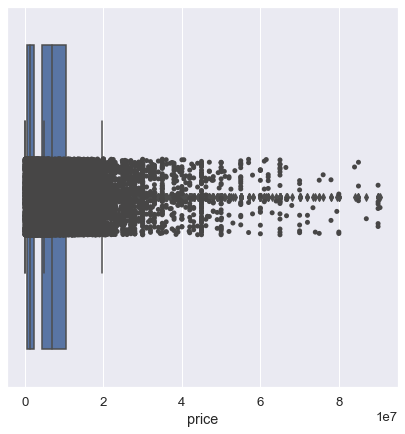

In [27]:
for i in df:
    sns.boxplot(x='price', data=i)
    sns.stripplot(x='price', data=i, color="#474646")

In [28]:
for i in df:
    idx = detect_outliers(i, 0, ["price","Area (m²)","viwers","Bedrooms","Bathrooms","negotiable","Level"])
    len(idx)
    i.drop(idx, axis=0, inplace=True)

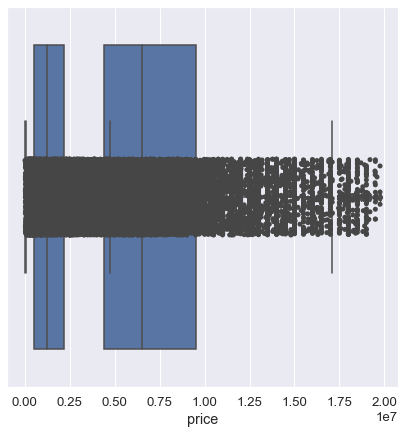

In [29]:
for i in df:
    sns.boxplot(x='price', data=i)
    sns.stripplot(x='price', data=i, color="#474646")

In [30]:
df_totla=pd.concat(df).drop_duplicates().reset_index(drop=True)

<AxesSubplot:xlabel='price'>

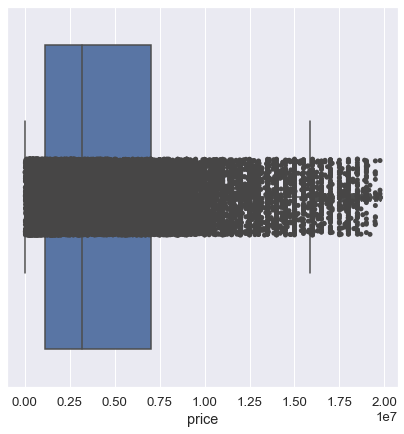

In [31]:
sns.boxplot(x='price', data=df_totla)
sns.stripplot(x='price', data=df_totla, color="#474646")

In [32]:
df_totla

,price,location,date,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),...,A/C,Covered,Maids,Built,Pool,Kitchen,Balcony,Water,Garden,Landline
0,7400000.0,Sheikh Zayed، Giza,2022-03-09,استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهي...,https://www.olx.com.eg/en/ad/8-IDcHny4.html,54,0,4,4,338.0,...,0,0,0,0,0,0,1,0,1,0
1,6500000.0,"New Cairo - El Tagamoa, Cairo",2022-03-10,توين هاوس 255م للبيع - هايد بارك - التجمع,https://www.olx.com.eg/en/ad/255-IDcqiQS.html,67,0,4,4,255.0,...,0,0,0,0,0,0,0,0,1,0
2,7600000.0,Madinaty، Cairo,2022-03-12,ارخص فيلا مستقله للبيع بمدينتى كامله التشطيب ع...,https://www.olx.com.eg/en/ad/-IDcHO0x.html,62,0,3,4,600.0,...,0,1,1,0,0,0,1,1,1,1
3,6250000.0,Sheikh Zayed، Giza,2022-03-10,#1فيلا تاون هاوس للبيع بالتقسيط 8سنوات في كمبو...,https://www.olx.com.eg/en/ad/1-8-IDcHx4j.html,42,0,4,4,220.0,...,0,1,1,0,1,0,1,1,1,1
4,7500000.0,Sheikh Zayed، Giza,2022-03-10,#11تاون هاوس كورنر للبيع مقدم5%تقسيط8سنواتVILL...,https://www.olx.com.eg/en/ad/11-5-8village-wes...,40,0,4,3,223.0,...,0,1,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27067,1380000.0,New Cairo - El Tagamoa، Cairo,2022-03-05,شقة للبيع في الحي الثاني بيت الوطن بالتقسيط عل...,https://www.olx.com.eg/en/ad/72-IDcGxjs.html,61,0,4,3,184.0,...,1,1,0,0,0,0,1,1,0,1
27068,1350000.0,Madinaty، Cairo,2022-03-05,شقة وايد جاردن للبيع ٩٦م بى7,https://www.olx.com.eg/en/ad/7-IDcGO9S.html,106,0,2,2,96.0,...,0,1,0,0,0,0,1,1,0,1
27069,1250000.0,New Cairo - El Tagamoa، Cairo,2022-03-05,شقة 115م دور اول يوجد اسانسير وجراج - 5 دقايق ...,https://www.olx.com.eg/en/ad/115-5-3-4-IDcGOab...,84,0,2,2,115.0,...,0,1,0,0,0,0,0,1,0,0
27070,1850000.0,Heliopolis، Cairo,2022-03-05,لراغبي الاستثمار بالتقسيط ارضي مدخل خاص 200م ن...,https://www.olx.com.eg/en/ad/200-IDcGO9M.html,237,0,4,2,200.0,...,0,0,0,0,0,0,0,1,0,0
